# APPLIED DATA SCIENCE CAPSTONE | FINAL PROJECT
# <font color = "blue"> Choose the Neighborhood To Live In Bogota, Colombia Based on Foursquare Venues


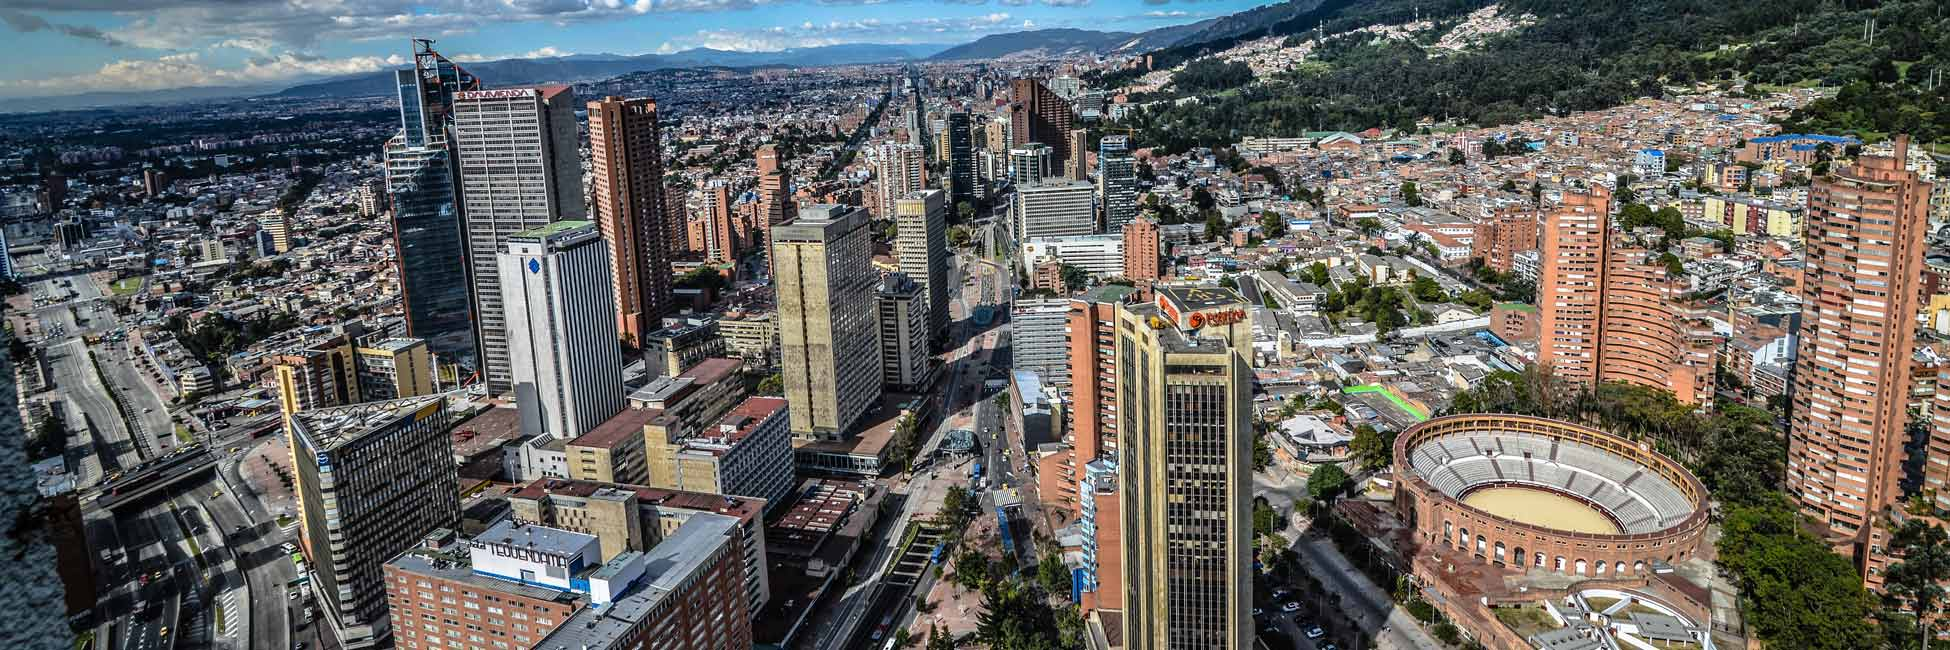

### INTRODUCTION

Bogota is a city with a population of ten million people. It has 81 postal codes, which makes it difficult to choose where to live, in case you dont know someone. This project purpose is to give insights of venues from the different neighborhoods in bogota, make a clustering, and be able to choose where to live based on what usually people look for.

#### First I will create a cell to import libraries

In [1]:
import numpy as np
import pandas as pd
import json
import requests

Downloading and exploring Dataset

In [2]:
bogota = pd.read_csv("http://visor.codigopostal.gov.co/472/visor/Codigos_Postales_Nacionales.csv")
bogota.head()

,noid,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,zona_postal,codigo_postal,limite_norte,limite_sur,limite_este,limite_oeste,tipo,barrios_contenidos_en_el_codigo_postal,veredas_contenidas_en_el_codigo_postal
0,3003,68,SANTANDER,68615,RIONEGRO,6875,687519,M. LA ESPE.- CACHI. Y RÍO CÁCHI.,M. LEBRIJA Y RÍO CÁCHI. DEL SUR,MUNICIPIO EL PLAYÓN,MUNICIPIO SABANA DE TORRES,Rural,Sin Informacion de Barrios,Caribe- Irlanda- Puerto Limón- Villa Eva- B...
1,3089,70,SUCRE,70204,COLOSO,7070,707030,KR 2,LIMITE URBANO,CL 1,LIMITE URBANO,Urbano,6 de Enero- Calle Nueva- Villa María,Sin Informacion de Veredas
2,183,5,ANTIOQUIA,5674,SAN VICENTE,540,54018,VIA SAN VICENTE - CONCEPCION,M. MARINILLA Y RÍO NEGRO,MUNICIPIO PEÑOL,MUNICIPIO GUARNE,Rural,Sin Informacion de Barrios,Compañia Abajo- El Canelo- El Carmelo- La Ca...
3,2089,44,LA GUAJIRA,44090,DIBULLA,4460,446007,MAR CARIBE,VÍA RIOHACHA-SANTA MARTA,MUNICIPIO RIOHACHA,VÍA CASA DE ALUMINIO-MAR CARIBE,Rural,Sin Informacion de Barrios,Sin Informacion de Veredas
4,877,15,BOYACA,15621,RONDON,1534,153420,LIMITE URBANO,LIMITE URBANO,LIMITE URBANO,LIMITE URBANO,Urbano,Sin Informacion de Barrios,Sin Informacion de Veredas


In [3]:
bogota.shape

(3681, 14)

Looks like this DataFrame is not only showing Bogota, but all Colombia, so I will filter to see only Bogota

In [4]:
bogota.nombre_departamento.unique()

array(['SANTANDER', 'SUCRE', 'ANTIOQUIA', 'LA GUAJIRA', 'BOYACA',
       'MAGDALENA', 'CUNDINAMARCA', 'META', 'TOLIMA', 'CAUCA',
       'ARCHIPIELAGO DE SAN ANDRES', 'CORDOBA', 'NARIÑO', 'HUILA',
       'BOGOTA D.C.', 'NORTE DE SANTANDER', 'CESAR', 'VALLE DEL CAUCA',
       'BOLIVAR', 'ATLANTICO', 'CHOCO', 'CALDAS', 'CASANARE', 'VAUPES',
       'CAQUETA', 'RISARALDA', 'QUINDIO', 'PUTUMAYO', 'AMAZONAS',
       'ARAUCA', 'VICHADA', 'GUAINIA', 'GUAVIARE'], dtype=object)

In [5]:
bogota_only = bogota[bogota["nombre_departamento"] =="BOGOTA D.C."]
bogota_only.head(20)

,noid,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,zona_postal,codigo_postal,limite_norte,limite_sur,limite_este,limite_oeste,tipo,barrios_contenidos_en_el_codigo_postal,veredas_contenidas_en_el_codigo_postal
24,519,11,BOGOTA D.C.,11001,LOCALIDAD TEUSAQUILLO,1113,111321,AC 63,DG 22A,AK 30,AK 68,Urbano,Acevedo Tejada- Campo Eucarístico- Campín Occi...,Sin Informacion de Veredas
83,468,11,BOGOTA D.C.,11001,LOCALIDAD CHAPINERO,1102,110231,AC 72,AC 39,LIMITE URBANO,AK 14,Urbano,Bosque Calderón- Cataluña- Chapinero Central- ...,Sin Informacion de Veredas
140,498,11,BOGOTA D.C.,11001,LOCALIDAD FONTIBON,1109,110931,AC 26,RIO FUCHA,AK 68,AK 86,Urbano,Bosque de Modelia- Capellanía- Ciudad Hayuelos...,Sin Informacion de Veredas
152,475,11,BOGOTA D.C.,11001,LOCALIDAD USME,1105,110511,TV 5C,AU LLANO,AK 51,CL 71A S,Urbano,Granada Sur- La Aurora- Marichuela- Nuevo San ...,Sin Informacion de Veredas
184,491,11,BOGOTA D.C.,11001,LOCALIDAD KENNEDY,1108,110841,AC 1 DE MAYO,AU SUR Y RIO TUNJUELITO,AK 68,CL 44 S,Urbano,Alqueria La Fragua- Alqueria La Fragua Norte- ...,Sin Informacion de Veredas
197,512,11,BOGOTA D.C.,11001,LOCALIDAD SUBA,1111,111161,CL 170,AC SUBA,KR 92,RIO BOGOTÁ,Urbano,Bosques de San Jorge- Campanella- El Pino- Las...,Sin Informacion de Veredas
247,517,11,BOGOTA D.C.,11001,LOCALIDAD BARRIOS UNIDOS,1112,111221,AC 72,AC 63,AK CARACAS - AK 14,AK 68,Urbano,Alcázares- Baquero- Benjamín Herrera- Colombia...,Sin Informacion de Veredas
335,535,11,BOGOTA D.C.,11001,LOCALIDAD CIUDAD BOLIVAR,1119,111961,DG 67A S Y CL 63 S,CL 97 S,RIO TUNJUELITO,KR 24,Urbano,Arabia- Bellavista Lucero Alto- Casa de Teja- ...,Sin Informacion de Veredas
415,496,11,BOGOTA D.C.,11001,LOCALIDAD FONTIBON,1109,110911,AC 63,AC 22,AK 86,RIO BOGOTÁ,Urbano,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,Sin Informacion de Veredas
486,507,11,BOGOTA D.C.,11001,LOCALIDAD SUBA,1111,111121,AC SUBA,AK 68,AK SUBA,KR 91 Y CL 93,Urbano,Almirante Colon- Altos de Chozica- Andes Norte...,Sin Informacion de Veredas


In [6]:
bogota_only.shape

(81, 14)

Will only leave required columns:

In [7]:
bogota_only.columns

Index(['noid', 'codigo_departamento', 'nombre_departamento',
       'codigo_municipio', 'nombre_municipio', 'zona_postal', 'codigo_postal',
       'limite_norte', 'limite_sur', 'limite_este', 'limite_oeste', 'tipo',
       'barrios_contenidos_en_el_codigo_postal',
       'veredas_contenidas_en_el_codigo_postal'],
      dtype='object')

In [8]:
bogota_only2 = bogota_only[['nombre_municipio', 'codigo_postal','barrios_contenidos_en_el_codigo_postal']].reset_index(drop=True)

bogota_only2.head()



,nombre_municipio,codigo_postal,barrios_contenidos_en_el_codigo_postal
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...


In [9]:
bogota_only2.shape

(81, 3)

In [10]:
columns_names = ["Borough","Postal Code","Neighborhood"]
bogota_only2.columns = columns_names
bogota_only2

,Borough,Postal Code,Neighborhood
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...
...,...,...,...
76,LOCALIDAD USME,110521,Alaska- Arrayanes I- Arrayanes V- Barranquilli...
77,LOCALIDAD SANTA FE,110321,El Dorado- El Guavio- El Rocío- Girardot- La C...
78,LOCALIDAD KENNEDY,110831,Cooperativa de Sub-Oficiales- Hipotecho- Hipot...
79,LOCALIDAD CHAPINERO,110211,La Esperanza- Páramo- Páramo I- Páramo II- Pár...


In [11]:
for i in range(int(bogota_only2.shape[0])):
    if bogota_only2.Neighborhood.iloc[i] == "Sin Informacion de Barrios":
        bogota_only2.Neighborhood.iloc[i] = bogota_only2.Borough.iloc[i]
bogota_only2.head()

/Users/MaAnSeGo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Borough,Postal Code,Neighborhood
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...


In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [12]:
bogota_only2.dtypes

Borough         object
Postal Code      int64
Neighborhood    object
dtype: object

In [13]:
bogota_only2.shape

(81, 3)

In [14]:
# pip install geocoder #was necessary to install geocoder

In [15]:
import geocoder # import geocoder

latitude = []
longitude = []

# loop until you get the coordinates
for j in bogota_only2["Postal Code"]:
    # initialize your variable to None   
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bogota, Colombia'.format(j))
        lat_lng_coords = g.latlng
        latitude.append(lat_lng_coords[0])
        longitude.append(lat_lng_coords[1])

In [16]:
bogota_only2["Latitude"] = latitude
bogota_only2["Longitude"] = longitude

In [17]:
bogota_only2.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.645420,-74.094400
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...,4.632283,-74.045805
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...,4.658656,-74.119585
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...,4.496341,-74.130810
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...,4.607185,-74.145908


In [18]:
bogota_only2.shape

(81, 5)

To understand what are the Boroughs, i checked the unique values that data has:

In [19]:
bogota_only2.Borough.unique()

array(['LOCALIDAD TEUSAQUILLO', 'LOCALIDAD CHAPINERO',
       'LOCALIDAD FONTIBON', 'LOCALIDAD USME', 'LOCALIDAD KENNEDY',
       'LOCALIDAD SUBA', 'LOCALIDAD BARRIOS UNIDOS',
       'LOCALIDAD CIUDAD BOLIVAR', 'LOCALIDAD BOSA',
       'LOCALIDAD SAN CRISTOBAL', 'LOCALIDAD RAFAEL URIBE URIBE',
       'LOCALIDAD ENGATIVA', 'LOCALIDAD PUENTE ARANDA',
       'LOCALIDAD SANTA FE', 'LOCALIDAD USAQUEN', 'LOCALIDAD SUMAPAZ',
       'LOCALIDAD CANDELARIA', 'LOCALIDAD ANTONIO NARIÑO',
       'LOCALIDAD LOS MARTIRES', 'LOCALIDAD TUNJUELITO'], dtype=object)

In [20]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [21]:
address = 'Bogota, CO'

geolocator = Nominatim(user_agent="bogota")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogota are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogota are 4.59808, -74.0760439.


Now lets do a map of Bogota:

In [22]:
# create map of Bogota using latitude and longitude values
map_bogota = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(bogota_only2['Latitude'], bogota_only2['Longitude'], bogota_only2['Borough'], bogota_only2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)  
    
map_bogota

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = '2BNBYYBCHSILUB3YTMXEHR3FICHOJO4CIT4SRSHK0GLJT3KT' # your Foursquare ID
CLIENT_SECRET = 'ZWOE1J5X0KZUEA21WT3MM2VHPSMLJKBAPMD4VTBOBPEE1NTE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2BNBYYBCHSILUB3YTMXEHR3FICHOJO4CIT4SRSHK0GLJT3KT
CLIENT_SECRET:ZWOE1J5X0KZUEA21WT3MM2VHPSMLJKBAPMD4VTBOBPEE1NTE


#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [24]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called  toronto_venues*.

In [25]:
bogota_venues = getNearbyVenues(names=bogota_only2['Neighborhood'],
                                   latitudes=bogota_only2['Latitude'],
                                   longitudes=bogota_only2['Longitude']
                                  )


Acevedo Tejada- Campo Eucarístico- Campín Occidental- Centro Administrativo Occ- Centro Nariño- Ciudad Salitre Nor-Oriental- Ciudad Salitre Sur-Oriental- Ciudad Universitaria- El Recuerdo- El Salitre- Gran América- La Esmeralda- Nicolás de Federman- Pablo
Bosque Calderón- Cataluña- Chapinero Central- Chapinero Norte- El Paraíso- Emaus- Granada- Hoya Teusaca- Ingemar- Ingemar Oriental- Ingemar Oriental I- Ingemar Oriental Rural- Juan XXIII- La Salle- Las Acacias- Marly- María Cristina- Pardo Rubio- Quinta C
Bosque de Modelia- Capellanía- Ciudad Hayuelos- El Vergel- Franco- Granjas de Techo- Interindustrial- La Esperanza Norte- La Esperanza Sur- Modelia- Modelia Occidental- Montevideo- Salitre Occidental- Santa Cecilia- Terminal de Transportes
Granada Sur- La Aurora- Marichuela- Nuevo San Andrés- San Juan Bautista- Santa Librada- Tunjuelito
Alqueria La Fragua- Alqueria La Fragua Norte- Boita- La Campiña- Las Delicias- Nueva York- Provivienda- Provivienda Occidental- Renania Urapanes- San

LOCALIDAD SUMAPAZ
Belén- Centro Administrativo- Egipto- La Catedral- La Concordia- Las Aguas- Parque Nacional Urbano- Santa Bárbara
Aguas Claras- Buenos Aires- Calvo Sur- El Triángulo- Hoya San Cristóbal- La María- Las Brisas- Los Laureles I- Modelo Sur- Molino Rural- Molinos de Oriente- Monte Carlo- Nariño Sur- Primero de Mayo- Quinta Ramos- San Cristóbal Sur- San Javier- Santa Ana S
Caracas- Ciudad Berna- Ciudad Jardín Sur- Eduardo Frey- La Fragua- La Fraguita- La Hortúa- Policarpa- Restrepo- Restrepo Occidental- San Antonio- Santander- Santander Sur- Sena- Sevilla- Villa Mayor Oriental
Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte
El Tintal III- El Tintal IV- La Magdalena- Osorio II- Tintalá- Vereda El Tintal Rural- Vereda El Tintal Urbano
Brisas del Llano- Chapinerito- El Bosque- El Bosque Central- El Bosque Central I- 

#### Let's check the size of the resulting dataframe

In [26]:
bogota_venues.shape

(477, 7)

In [27]:
bogota_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Hamburguesas El Corral,4.647428,-74.093518,Burger Joint
1,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Esturión,4.648340,-74.093999,Peruvian Restaurant
2,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Juan Valdez Café,4.643856,-74.091203,Coffee Shop
3,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Pescadero La Subienda,4.646799,-74.092956,Seafood Restaurant
4,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Star Pizza,4.649260,-74.092538,Pizza Place


Let's check how many venues were returned for each neighborhood

In [28]:
bogota_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abraham Lincoln- Area Artilleria- Parque El Tunal- San Benito- San Carlos- Tunal Oriental- Tunjuelito,2,2,2,2,2,2
Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte,43,43,43,43,43,43
Acevedo Tejada- Campo Eucarístico- Campín Occidental- Centro Administrativo Occ- Centro Nariño- Ciudad Salitre Nor-Oriental- Ciudad Salitre Sur-Oriental- Ciudad Universitaria- El Recuerdo- El Salitre- Gran América- La Esmeralda- Nicolás de Federman- Pablo,11,11,11,11,11,11
Aeropuerto El Dorado- Atahualpa- Brisas Aldea Fontibón- Charco Rural- El Refugio- Ferrocaja Fontibón- La Cabaña Fontibón- Las Navetas- Pueblo Viejo- Puerta de Teja- San José de Fontibón- Versalles Fontibón,37,37,37,37,37,37
Alcalá- Alqueria- Autopista Sur- Galán- La Camelia- Ospina Pérez- Ospina Pérez Sur- Provivienda Norte- San Eusebio- Tejar,4,4,4,4,4,4
Alcázares Norte- Doce de Octubre- Entrerríos- Escuela Militar- Jorge Eliecer Gaitán- Juan XXIII- La Aurora- La Castellana- La Libertad- La Patria- Los Andes- Metrópolis- Once de Noviembre- Polo Club- Rionegro- San Felipe- San Fernando Occidental- Santa So,5,5,5,5,5,5
Alcázares- Baquero- Benjamín Herrera- Colombia- Concepción Norte- El Rosario- José Joaquín Vargas- La Esperanza- La Merced Norte- La Paz- Muequeta- Parque Distrital Salitre- Parque Popular Salitre- Popular Modelo- Quinta Mutis- Rafael Uribe- San Fernando-,5,5,5,5,5,5
Alfonso Lopez- Armenia- Banco central- Belalcázar- Campín- Chapinero Occidental- Estrella- Galerías- La Magdalena- La Soledad- Las Américas- Palermo- Quesada- San Luis- Santa Teresita- Teusaquillo,20,20,20,20,20,20
Almirante Colon- Altos de Chozica- Andes Norte- Ciudad Hunza- Club de Los Lagartos- Julio Flórez- Los Naranjos- Niza Norte- Niza Suba- Niza Sur- Potosí- Santa Rosa- Vereda Suba Naranjos,4,4,4,4,4,4


#### Let's find out how many unique categories can be curated from all the returned venues

In [29]:
print('There are {} uniques categories.'.format(len(bogota_venues['Venue Category'].unique())))

There are 146 uniques categories.


##  Analyze Each Neighborhood

In [30]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Neighborhood'] = bogota_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Wings Joint,Airport,Airport Lounge,Airport Service,Airport Terminal,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Museum,Asian Restaurant,...,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bogota_onehot.shape

(477, 146)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [32]:
bogota_grouped = bogota_onehot.groupby('Neighborhood').mean().reset_index()
bogota_grouped

,Neighborhood,Wings Joint,Airport,Airport Lounge,Airport Service,Airport Terminal,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Museum,...,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant
0,Abraham Lincoln- Area Artilleria- Parque El Tu...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,...,0.000000,0.046512,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,Acevedo Tejada- Campo Eucarístico- Campín Occi...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,0.000000,0.027027,0.162162,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.027027,0.000000,0.000000,0.000000
4,Alcalá- Alqueria- Autopista Sur- Galán- La Cam...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,Alcázares Norte- Doce de Octubre- Entrerríos- ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,Alcázares- Baquero- Benjamín Herrera- Colombia...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,Alfonso Lopez- Armenia- Banco central- Belalcá...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,Almirante Colon- Altos de Chozica- Andes Norte...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,Alqueria La Fragua- Alqueria La Fragua Norte- ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [33]:
bogota_grouped.shape

(57, 146)

#### Let's print each neighborhood along with the top 5 most common venues

In [34]:
num_top_venues = 5

for hood in bogota_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abraham Lincoln- Area Artilleria- Parque El Tunal- San Benito- San Carlos- Tunal Oriental- Tunjuelito----
                     venue  freq
0                     Park   0.5
1      Leather Goods Store   0.5
2              Wings Joint   0.0
3  New American Restaurant   0.0
4                Multiplex   0.0


----Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte----
                  venue  freq
0  Fast Food Restaurant  0.09
1  Gym / Fitness Center  0.05
2           Pizza Place  0.05
3          Burger Joint  0.05
4                 Plaza  0.05


----Acevedo Tejada- Campo Eucarístico- Campín Occidental- Centro Administrativo Occ- Centro Nariño- Ciudad Salitre Nor-Oriental- Ciudad Salitre Sur-Oriental- Ciudad Universitaria- El Recuerdo- El Salitre- Gran América- La Esmeralda- Nicolás de Federman- Pablo----
                       ve

4             Gym  0.12


----Bravo Páez- Centenario- Claret- Inglés- Libertador- Murillo Toro- Olaya- Quiroga- Quiroga Central- Quiroga Sur- Santa Lucía- Santiago Pérez- Villa Mayor----
                     venue  freq
0                 Pharmacy  0.25
1       Mexican Restaurant  0.25
2             Burger Joint  0.25
3              Wings Joint  0.00
4  New American Restaurant  0.00


----Buenavista- Canaima- El Cerezo- El Redil- El Rocío Norte- El Vervenal- Horizontes Norte- La Estrellita- La Estrellita I- La Granja Norte- La Uribe- Mirador del Norte- San Antonio Noroccidental- San Antonio Norte- San José de Usaquén- Tibabita- Tibabita I-----
         venue  freq
0   Lighthouse  0.17
1      Dog Run  0.17
2      Brewery  0.17
3  Bus Station  0.17
4       Market  0.17


----Calandaima- Campo Hermoso- El Paraíso- El Paraíso Bosa- Galán- Galán Rural- Osorio III- Patio Bonito- Patio Bonito II- Patio Bonito III- Tairona----
             venue  freq
0      Supermarket  0.25
1       Print Shop

#### Let's put that into a *pandas* dataframe

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_grouped['Neighborhood']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abraham Lincoln- Area Artilleria- Parque El Tu...,Park,Leather Goods Store,Vegetarian / Vegan Restaurant,Dessert Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Department Store
1,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,Fast Food Restaurant,Pizza Place,Plaza,Fried Chicken Joint,Gym / Fitness Center,Bar,Bakery,Supermarket,Burger Joint,Music Store
2,Acevedo Tejada- Campo Eucarístico- Campín Occi...,Pizza Place,Restaurant,Peruvian Restaurant,South American Restaurant,Burger Joint,Sandwich Place,Seafood Restaurant,Latin American Restaurant,Coffee Shop,Food Truck
3,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,Airport Lounge,Coffee Shop,Café,Cosmetics Shop,Donut Shop,Pizza Place,Italian Restaurant,Fried Chicken Joint,Duty-free Shop,Cupcake Shop
4,Alcalá- Alqueria- Autopista Sur- Galán- La Cam...,Fast Food Restaurant,Department Store,Ice Cream Shop,Salad Place,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [37]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

bogota_grouped_clustering = bogota_grouped.drop('Neighborhood', axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bogota_merged = bogota_only2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bogota_merged = bogota_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bogota_merged.dropna(axis=0, inplace = True)

bogota_merged.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.645420,-74.094400,0.0,Pizza Place,Restaurant,Peruvian Restaurant,South American Restaurant,Burger Joint,Sandwich Place,Seafood Restaurant,Latin American Restaurant,Coffee Shop,Food Truck
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...,4.658656,-74.119585,0.0,Shopping Mall,Bar,Theme Park,Creperie,Furniture / Home Store,Dessert Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...,4.607185,-74.145908,0.0,Athletics & Sports,Hotel,Sandwich Place,Restaurant,Pub,Pizza Place,Seafood Restaurant,Furniture / Home Store,Creperie,Cultural Center
6,LOCALIDAD BARRIOS UNIDOS,111221,Alcázares- Baquero- Benjamín Herrera- Colombia...,4.662365,-74.078465,0.0,Soccer Field,Clothing Store,Café,Auto Garage,Vegetarian / Vegan Restaurant,Dive Bar,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop
8,LOCALIDAD FONTIBON,110911,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,4.695895,-74.144576,0.0,Airport Lounge,Coffee Shop,Café,Cosmetics Shop,Donut Shop,Pizza Place,Italian Restaurant,Fried Chicken Joint,Duty-free Shop,Cupcake Shop


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Latitude'], bogota_merged['Longitude'], bogota_merged['Neighborhood'], bogota_merged['Cluster Labels'].astype('int')):
    #label = '{}, {}'.format(neighborhood, borough)
    #label = folium.Popup(label, parse_html=True)
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [44]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 0, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,111321,0.0,Pizza Place,Restaurant,Peruvian Restaurant,South American Restaurant,Burger Joint,Sandwich Place,Seafood Restaurant,Latin American Restaurant,Coffee Shop,Food Truck
2,110931,0.0,Shopping Mall,Bar,Theme Park,Creperie,Furniture / Home Store,Dessert Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run
4,110841,0.0,Athletics & Sports,Hotel,Sandwich Place,Restaurant,Pub,Pizza Place,Seafood Restaurant,Furniture / Home Store,Creperie,Cultural Center
6,111221,0.0,Soccer Field,Clothing Store,Café,Auto Garage,Vegetarian / Vegan Restaurant,Dive Bar,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop
8,110911,0.0,Airport Lounge,Coffee Shop,Café,Cosmetics Shop,Donut Shop,Pizza Place,Italian Restaurant,Fried Chicken Joint,Duty-free Shop,Cupcake Shop
9,111121,0.0,Bus Station,Scenic Lookout,Golf Course,Burger Joint,Vegetarian / Vegan Restaurant,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop
10,110721,0.0,Department Store,Perfume Shop,Athletics & Sports,Dessert Shop,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar
14,111151,0.0,Construction & Landscaping,Health Food Store,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop,Department Store
15,110871,0.0,Shopping Mall,Supermarket,Burger Joint,Print Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cosmetics Shop,Deli / Bodega
16,111821,0.0,Arepa Restaurant,Music Venue,Vegetarian / Vegan Restaurant,Dessert Shop,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar


In [45]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 1, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
72,111931,1.0,Music Store,Vegetarian / Vegan Restaurant,Construction & Landscaping,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop


In [46]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 2, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,110741,2.0,Restaurant,Bar,Vegetarian / Vegan Restaurant,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop
40,110881,2.0,Bar,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop


In [47]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 3, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,111831,3.0,Motorcycle Shop,Vegetarian / Vegan Restaurant,Construction & Landscaping,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Dessert Shop


In [48]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 4, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,111131,4.0,Park,Vegetarian / Vegan Restaurant,Dessert Shop,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Department Store
36,111911,4.0,Fast Food Restaurant,Park,Dessert Shop,Fabric Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Department Store
73,110621,4.0,Park,Leather Goods Store,Vegetarian / Vegan Restaurant,Dessert Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Department Store
75,111841,4.0,Market,Park,Vegetarian / Vegan Restaurant,Dessert Shop,Duty-free Shop,Drugstore,Donut Shop,Dog Run,Dive Bar,Department Store
